In [1]:
# import Dependencies and Setup
%matplotlib inline
import gmaps
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
import requests
import time
import requests
import json
import datetime
from config import api_key
# Google developer API key
from config import gkey
# Configure gmaps
import pprint 
from scipy.stats import linregress

In [3]:
#variables to append queried API data for each citiers for historical weather data
#capture list of PJM Cities from CSV files gathered from DB's
path = "Resources/DUQ city.csv"
city_data = pd.read_csv(path)
cities = city_data['city_state']
humidity = []
wind_speed = []
city_name = []
precip = []
condition = []
avg_temp= []
date_new=[]
#gather weather 5 days historical weather data from World Weather API @ https://www.apixu.com/api.aspx 

#format for weather API request calls - http://api.apixu.com/v1/search.json?key=<YOUR_API_KEY>&q=lond
historic_url = "http://api.apixu.com/v1/history.json?"
forecast_url = "http://api.apixu.com/v1/forecast.json?"
current_url = "http://api.apixu.com/v1/current.json?"
units = "imperial"
#Build partial query URL
#historical request, dt should be in yyyy-MM-dd format after 1st Jan, 2015

historic_query_url = f"{historic_url}key={api_key}&q="
current_query_url = f"{current_url}key={api_key}&q="
response = requests.get(current_query_url).json()

#capture the dates for which we will read historical weather data (for each of the days upto 5 days prior)
hist_dates = []
for x in range(1, 6, 1):
    hist_dates.append(datetime.date.today() - datetime.timedelta(days=int(x)))
#print(hist_dates)

#capture past weather data for each cities serviced by the selected PNODE
print("Begining Data Retrieval") 
print("------------------------") 
for date in hist_dates:
    for city in cities:
        try:
            city_url = historic_query_url + city+"&dt="+str(date)
            print(city_url)
            response = requests.get(city_url).json()
            avg_temp.append(response['forecast']['forecastday'][0]['day']['avgtemp_f'])
            humidity.append(response['forecast']['forecastday'][0]['day']['avghumidity'])
            wind_speed.append(response['forecast']['forecastday'][0]['day']['maxwind_mph'])
            precip.append(response['forecast']['forecastday'][0]['day']['totalprecip_in'])
            condition.append(response['forecast']['forecastday'][0]['day']['condition']['text'])
            city_name.append(city)
            date_new.append(date)
            print(f"Retrieving Results for Index |{city} for date - {date}.")
        except (KeyError, IndexError, ConnectionResetError):
            print("Missing field/result... skipping.")   
print("--------------------------------------------------")
print("Data Retrieval Complete")

Begining Data Retrieval
------------------------
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Aliquippa,PA&dt=2018-11-22
Retrieving Results for Index |Aliquippa,PA for date - 2018-11-22.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Allison Park,PA&dt=2018-11-22
Retrieving Results for Index |Allison Park,PA for date - 2018-11-22.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Ambridge,PA&dt=2018-11-22
Retrieving Results for Index |Ambridge,PA for date - 2018-11-22.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Baden,PA&dt=2018-11-22
Retrieving Results for Index |Baden,PA for date - 2018-11-22.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Bairdford,PA&dt=2018-11-22
Retrieving Results for Index |Bairdford,PA for date - 2018-11-22.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Bakerstown,PA&dt=2018-11-22
Retrieving Results

Retrieving Results for Index |West Mifflin,PA for date - 2018-11-22.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Wildwood,PA&dt=2018-11-22
Retrieving Results for Index |Wildwood,PA for date - 2018-11-22.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Wilmerding,PA&dt=2018-11-22
Retrieving Results for Index |Wilmerding,PA for date - 2018-11-22.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Aliquippa,PA&dt=2018-11-21
Retrieving Results for Index |Aliquippa,PA for date - 2018-11-21.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Allison Park,PA&dt=2018-11-21
Retrieving Results for Index |Allison Park,PA for date - 2018-11-21.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Ambridge,PA&dt=2018-11-21
Retrieving Results for Index |Ambridge,PA for date - 2018-11-21.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Baden,PA&dt=2018-1

Retrieving Results for Index |Turtle Creek,PA for date - 2018-11-21.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Verona,PA&dt=2018-11-21
Retrieving Results for Index |Verona,PA for date - 2018-11-21.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=West Mifflin,PA&dt=2018-11-21
Retrieving Results for Index |West Mifflin,PA for date - 2018-11-21.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Wildwood,PA&dt=2018-11-21
Retrieving Results for Index |Wildwood,PA for date - 2018-11-21.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Wilmerding,PA&dt=2018-11-21
Retrieving Results for Index |Wilmerding,PA for date - 2018-11-21.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Aliquippa,PA&dt=2018-11-20
Retrieving Results for Index |Aliquippa,PA for date - 2018-11-20.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Allison Park,PA&dt=201

Retrieving Results for Index |South Heights,PA for date - 2018-11-20.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Springdale,PA&dt=2018-11-20
Retrieving Results for Index |Springdale,PA for date - 2018-11-20.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Turtle Creek,PA&dt=2018-11-20
Retrieving Results for Index |Turtle Creek,PA for date - 2018-11-20.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Verona,PA&dt=2018-11-20
Retrieving Results for Index |Verona,PA for date - 2018-11-20.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=West Mifflin,PA&dt=2018-11-20
Retrieving Results for Index |West Mifflin,PA for date - 2018-11-20.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Wildwood,PA&dt=2018-11-20
Retrieving Results for Index |Wildwood,PA for date - 2018-11-20.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Wilmerding,PA&d

Retrieving Results for Index |Sewickley,PA for date - 2018-11-19.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Shippingport,PA&dt=2018-11-19
Retrieving Results for Index |Shippingport,PA for date - 2018-11-19.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=South Heights,PA&dt=2018-11-19
Retrieving Results for Index |South Heights,PA for date - 2018-11-19.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Springdale,PA&dt=2018-11-19
Retrieving Results for Index |Springdale,PA for date - 2018-11-19.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Turtle Creek,PA&dt=2018-11-19
Retrieving Results for Index |Turtle Creek,PA for date - 2018-11-19.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Verona,PA&dt=2018-11-19
Retrieving Results for Index |Verona,PA for date - 2018-11-19.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=West Miff

Retrieving Results for Index |Rochester,PA for date - 2018-11-18.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Russellton,PA&dt=2018-11-18
Retrieving Results for Index |Russellton,PA for date - 2018-11-18.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Sewickley,PA&dt=2018-11-18
Retrieving Results for Index |Sewickley,PA for date - 2018-11-18.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Shippingport,PA&dt=2018-11-18
Retrieving Results for Index |Shippingport,PA for date - 2018-11-18.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=South Heights,PA&dt=2018-11-18
Retrieving Results for Index |South Heights,PA for date - 2018-11-18.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Springdale,PA&dt=2018-11-18
Retrieving Results for Index |Springdale,PA for date - 2018-11-18.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Turtle 

In [4]:
#create data frame
hweather_dict = {
    "City/State":city_name,
    "Temp":avg_temp,
    "Humidity":humidity,
    "Precipitation":precip,
    "Wind Speed":wind_speed,
    "Weather Condition":condition,
    "Date":date_new    
}
hweather_dict = pd.DataFrame(hweather_dict)
hweather_dict.to_csv(
    "Resources/WeatherData.csv", encoding="utf-8", index=False)
hweather_dict.head()

,City/State,Temp,Humidity,Precipitation,Wind Speed,Weather Condition,Date
0,"Aliquippa,PA",23.4,61.0,0.0,5.8,Partly cloudy,2018-11-22
1,"Allison Park,PA",22.5,61.0,0.0,6.9,Partly cloudy,2018-11-22
2,"Ambridge,PA",23.4,61.0,0.0,5.8,Partly cloudy,2018-11-22
3,"Baden,PA",23.4,61.0,0.0,5.8,Partly cloudy,2018-11-22
4,"Bairdford,PA",22.5,60.0,0.0,6.9,Partly cloudy,2018-11-22


In [5]:
#group all cities to find weather means for the dates to run regression analysis
hweather_df = pd.DataFrame(hweather_dict)
hweather_df['pnode'] = "DUQ"

grouped_weather = hweather_df.groupby(['Date'])
grouped_avg = grouped_weather.mean()
grouped_avg['Temp'] = grouped_weather['Temp'].mean()
grouped_avg['Humidity'] = grouped_weather['Humidity'].mean()
grouped_avg['Preciptation'] = grouped_weather['Precipitation'].mean()
grouped_avg['Wind_Speed'] = grouped_weather['Wind Speed'].mean()

grouped_avg_df = pd.DataFrame(grouped_avg)
grouped_avg_df


,Temp,Humidity,Precipitation,Wind Speed,Preciptation,Wind_Speed
Date,,,,,,
2018-11-18,39.011765,85.254902,0.125490,6.200000,0.125490,6.200000
2018-11-19,38.611765,87.333333,0.413137,6.778431,0.413137,6.778431
2018-11-20,37.174510,82.098039,0.065490,9.431373,0.065490,9.431373
2018-11-21,38.072549,74.176471,0.040196,11.721569,0.040196,11.721569
2018-11-22,30.260784,61.980392,0.016275,7.070588,0.016275,7.070588


In [6]:
#capture forecast data for each cities serviced by the selected PNODE
temp_forecast = []
humidity_forecast = []
wind_speed_forecast = []
city_name_forecast = []
precip_forecast = []
condition_forecast = []

#http://api.apixu.com/v1/search.json?key=<YOUR_API_KEY>&q=lond
forecast_url = "http://api.apixu.com/v1/forecast.json?"

city_fc_url = f"http://api.apixu.com/v1/forecast.json?key={api_key}&q="
fcast_date = datetime.date.today() + datetime.timedelta(days=1)

print("Begining Data Retrieval") 
print("---------------------------------------------------") 

for city in cities:
    try:
        fcast_url = city_fc_url+city+"&days=str(fcast_date)"
        fresponse = requests.get(fcast_url).json()
        temp_forecast.append(fresponse['forecast']['forecastday'][0]['day']['avgtemp_f'])
        humidity_forecast.append(fresponse['forecast']['forecastday'][0]['day']['avghumidity'])
        wind_speed_forecast.append(fresponse['forecast']['forecastday'][0]['day']['maxwind_mph'])
        precip_forecast.append(fresponse['forecast']['forecastday'][0]['day']['totalprecip_in'])
        condition_forecast.append(fresponse['forecast']['forecastday'][0]['day']['condition']['text'])
        city_name_forecast.append(fresponse['location']['name'])
        print(f"Retrieving Results for Index |{city} for next day - {fcast_date}.")

    except (KeyError, IndexError, ConnectionResetError):
        print("Missing field/result... skipping.")

        
print("--------------------------------------------------")
print("Data Retrieval Complete")

Begining Data Retrieval
---------------------------------------------------
Retrieving Results for Index |Aliquippa,PA for next day - 2018-11-24.
Retrieving Results for Index |Allison Park,PA for next day - 2018-11-24.
Retrieving Results for Index |Ambridge,PA for next day - 2018-11-24.
Retrieving Results for Index |Baden,PA for next day - 2018-11-24.
Retrieving Results for Index |Bairdford,PA for next day - 2018-11-24.
Retrieving Results for Index |Bakerstown,PA for next day - 2018-11-24.
Retrieving Results for Index |Beaver,PA for next day - 2018-11-24.
Retrieving Results for Index |Braddock,PA for next day - 2018-11-24.
Retrieving Results for Index |Carnegie,PA for next day - 2018-11-24.
Retrieving Results for Index |Cheswick,PA for next day - 2018-11-24.
Retrieving Results for Index |Clinton,PA for next day - 2018-11-24.
Retrieving Results for Index |Conway,PA for next day - 2018-11-24.
Retrieving Results for Index |Coraopolis,PA for next day - 2018-11-24.
Retrieving Results for In

In [25]:
#create data frame

fcast_weather_dict = {
    "City/State":city_name_forecast,
    "Temp":temp_forecast,
    "Humidity":humidity_forecast,
    "Precipitation":precip_forecast,
    "Wind Speed":wind_speed_forecast,
    "Weather Condition":condition_forecast
    
}
fcast_weather_data = pd.DataFrame(fcast_weather_dict)
fcast_weather_data.to_csv(
    "Resources/ForecastWeatherData.csv", encoding="utf-8", index=False)
fcast_weather_data["pnode"]="DUQ"
fcast_weather_data.head()

,City/State,Temp,Humidity,Precipitation,Wind Speed,Weather Condition,pnode
0,Aliquippa,30.6,60.0,0.0,6.3,Partly cloudy,DUQ
1,Allison Park,29.0,60.0,0.0,8.1,Partly cloudy,DUQ
2,Ambridge,30.6,60.0,0.0,6.3,Partly cloudy,DUQ
3,Baden,30.6,60.0,0.0,6.3,Partly cloudy,DUQ
4,Bairdford,28.1,57.0,0.0,6.5,Partly cloudy,DUQ


In [26]:
#group forecasted cities weather to find average for the area
fcast_weather_dict = {
    "City/State":city_name_forecast,
    "Temp":temp_forecast,
    "Humidity":humidity_forecast,
    "Precipitation":precip_forecast,
    "Wind Speed":wind_speed_forecast,
    "Weather Condition":condition_forecast
    
}
fcast_weather_data = pd.DataFrame(fcast_weather_dict)
fcast_weather_data.to_csv(
    "Resources/ForecastWeatherData.csv", encoding="utf-8", index=False)
fcast_weather_data["pnode"]="DUQ"

grouped_weather_fore = fcast_weather_data.groupby(['pnode'])
grouped_avg_fore = grouped_weather_fore.mean()
grouped_avg_fore['Temp'] = grouped_weather_fore['Temp'].mean()
grouped_avg_fore['Humidity'] = grouped_weather_fore['Humidity'].mean()
grouped_avg_fore['Preciptation'] = grouped_weather_fore['Precipitation'].mean()
grouped_avg_fore['Wind_Speed'] = grouped_weather_fore['Wind Speed'].mean()

grouped_avg_fore_df = pd.DataFrame(grouped_avg_fore)
grouped_avg_fore_df


,Temp,Humidity,Precipitation,Wind Speed,Preciptation,Wind_Speed
pnode,,,,,,
DUQ,35.366667,60.745098,0.043725,7.801961,0.043725,7.801961


In [27]:
#import regression weights
path = 'Resources/DUQ Regression.csv'
regress_data = pd.read_csv(path)
regress_data.head()

,pnode,Time,intercept,Load,Temp,Hum,Prec,Wind,forecast_rt_lmp
0,DUQ,0:00,-80.4,0.0588,-0.078,0.417,-17.6,0.932,NaN
1,DUQ,1:00,-83.3,0.0588,-0.078,0.417,-17.6,0.932,NaN
2,DUQ,2:00,-82.7,0.0588,-0.078,0.417,-17.6,0.932,NaN
3,DUQ,3:00,-82.4,0.0588,-0.078,0.417,-17.6,0.932,NaN
4,DUQ,4:00,-82.8,0.0588,-0.078,0.417,-17.6,0.932,NaN


In [28]:
#import tomorrow load forecast
load_data = pd.read_csv('Resources/rt_load_foracast 11.14.18.csv')
merged = pd.merge(regress_data, load_data, how='outer', on='Time')
merged.head()

,pnode,Time,intercept,Load,Temp,Hum,Prec,Wind,forecast_rt_lmp,forecast_datetime_beginning_ept,forecast_load_mw
0,DUQ,0:00,-80.4,0.0588,-0.078,0.417,-17.6,0.932,NaN,NaN,1489
1,DUQ,1:00,-83.3,0.0588,-0.078,0.417,-17.6,0.932,NaN,11/14/2018 0:00,1419
2,DUQ,2:00,-82.7,0.0588,-0.078,0.417,-17.6,0.932,NaN,11/14/2018 1:00,1390
3,DUQ,3:00,-82.4,0.0588,-0.078,0.417,-17.6,0.932,NaN,11/14/2018 2:00,1379
4,DUQ,4:00,-82.8,0.0588,-0.078,0.417,-17.6,0.932,NaN,11/14/2018 3:00,1385


In [29]:
#merge the weather data with regression weights to determine the forecasted price
merged_data = pd.merge(merged,grouped_avg_fore_df, how='outer', on='pnode')
merged_data.head()

,pnode,Time,intercept,Load,Temp_x,Hum,Prec,Wind,forecast_rt_lmp,forecast_datetime_beginning_ept,forecast_load_mw,Temp_y,Humidity,Precipitation,Wind Speed,Preciptation,Wind_Speed
0,DUQ,0:00,-80.4,0.0588,-0.078,0.417,-17.6,0.932,NaN,NaN,1489,35.366667,60.745098,0.043725,7.801961,0.043725,7.801961
1,DUQ,1:00,-83.3,0.0588,-0.078,0.417,-17.6,0.932,NaN,11/14/2018 0:00,1419,35.366667,60.745098,0.043725,7.801961,0.043725,7.801961
2,DUQ,2:00,-82.7,0.0588,-0.078,0.417,-17.6,0.932,NaN,11/14/2018 1:00,1390,35.366667,60.745098,0.043725,7.801961,0.043725,7.801961
3,DUQ,3:00,-82.4,0.0588,-0.078,0.417,-17.6,0.932,NaN,11/14/2018 2:00,1379,35.366667,60.745098,0.043725,7.801961,0.043725,7.801961
4,DUQ,4:00,-82.8,0.0588,-0.078,0.417,-17.6,0.932,NaN,11/14/2018 3:00,1385,35.366667,60.745098,0.043725,7.801961,0.043725,7.801961


In [30]:
#calculate forecasted price based on the weights assigned to the weather variables (Temp, humidity, precepitation)
                                           
merged_data['forecast_rt_lmp']= merged_data['intercept'] + merged_data['Load']*merged_data['forecast_load_mw']+merged_data['Temp_x']*merged_data['Temp_y']+merged_data['Hum']*merged_data['Humidity']+merged_data['Prec']*merged_data['Precipitation']+merged_data['Wind']*merged_data['Wind Speed']
                                           


merged_data.to_csv(
    "Resources/Forecast_rt.csv", encoding="utf-8", index=False)



merged_data.head()

,pnode,Time,intercept,Load,Temp_x,Hum,Prec,Wind,forecast_rt_lmp,forecast_datetime_beginning_ept,forecast_load_mw,Temp_y,Humidity,Precipitation,Wind Speed,Preciptation,Wind_Speed
0,DUQ,0:00,-80.4,0.0588,-0.078,0.417,-17.6,0.932,36.227165,NaN,1489,35.366667,60.745098,0.043725,7.801961,0.043725,7.801961
1,DUQ,1:00,-83.3,0.0588,-0.078,0.417,-17.6,0.932,29.211165,11/14/2018 0:00,1419,35.366667,60.745098,0.043725,7.801961,0.043725,7.801961
2,DUQ,2:00,-82.7,0.0588,-0.078,0.417,-17.6,0.932,28.105965,11/14/2018 1:00,1390,35.366667,60.745098,0.043725,7.801961,0.043725,7.801961
3,DUQ,3:00,-82.4,0.0588,-0.078,0.417,-17.6,0.932,27.759165,11/14/2018 2:00,1379,35.366667,60.745098,0.043725,7.801961,0.043725,7.801961
4,DUQ,4:00,-82.8,0.0588,-0.078,0.417,-17.6,0.932,27.711965,11/14/2018 3:00,1385,35.366667,60.745098,0.043725,7.801961,0.043725,7.801961


In [31]:
#read combined data CSV for weather, load & price data to determine correlation with price
combined_data = pd.read_csv('Resources/DUQ All Data1.csv')
combined_data.head()

,datetime_beginning_ept,time,pnode_name,total_lmp_rt,load,Average of Temp,Average of Humidity,Average of Precipitation
0,43409,0,DUQ,19.561206,1216.000000,55.978431,80.078431,0.139608
1,43409,1,DUQ,19.619078,1185.800000,55.978431,80.078431,0.139608
2,43409,2,DUQ,19.795198,1176.200000,55.978431,80.078431,0.139608
3,43409,3,DUQ,20.247282,1176.400000,55.978431,80.078431,0.139608
4,43409,4,DUQ,20.736460,1208.666667,55.978431,80.078431,0.139608


In [32]:
# # Set line
# x_axis = combined_data['total_lmp_rt']

# (slope, intercept, _, _, _) = linregress(x_axis, combined_data['load'])
# fit = slope * x_axis + intercept
# fig, ax = plt.subplots()

# fig.suptitle("Load VS Price", fontsize=16, fontweight="bold")

# # ax.set_xlim(0, 10)
# # ax.set_ylim(0, 10)

# ax.set_xlabel("Price(in $)")
# ax.set_ylabel("Load (in Megga Watts)")

# ax.plot(x_axis, combined_data['load'], linewidth=0, marker='o')
# ax.plot(x_axis, fit, 'b--')


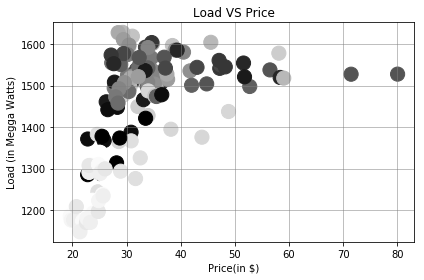

In [33]:
# Create a legend
# plot correlation between load and price
combined_data.plot.scatter('total_lmp_rt', 'load', s=200, c=combined_data['time'])

plt.title("Load VS Price")
plt.xlabel("Price(in $)")
plt.ylabel("Load (in Megga Watts)")
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.tight_layout()
# Save Figure
plt.savefig("Images/loadvsPrice.png")
plt.show()

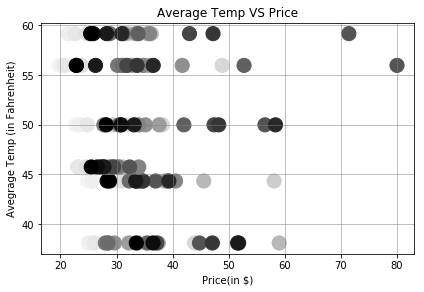

In [34]:
# load_price
# plot correlation between temperature and price
combined_data.plot.scatter('total_lmp_rt', 'Average of Temp', s=200, c=combined_data['time'])
plt.tight_layout()
plt.title("Average Temp VS Price")
plt.ylabel("Avegrage Temp (in Fahrenheit)")
plt.xlabel("Price(in $)")
plt.grid(color='gray', linestyle='-', linewidth=0.5)
#plt.text(2000, 2000, textstr, fontsize=14)
# Save Figure
plt.savefig("Images/AvgTempvsPrice.png")
#combined_data.plot.scatter('total_lmp_rt', 'load', c=combined_data['time'])
plt.show()

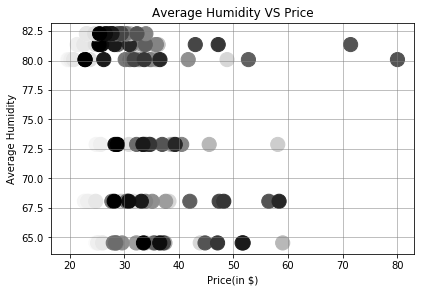

In [35]:
# plot correlation between humidity and price
combined_data.plot.scatter('total_lmp_rt', 'Average of Humidity', s=200, c=combined_data['time'])
plt.tight_layout()
plt.title("Average Humidity VS Price")
plt.ylabel("Average Humidity")
plt.xlabel("Price(in $)")
plt.grid(color='gray', linestyle='-', linewidth=0.5)
#plt.text(2000, 2000, textstr, fontsize=14)
# Save Figure
plt.savefig("Images/AvgHumidityvsPrice.png")
plt.show()

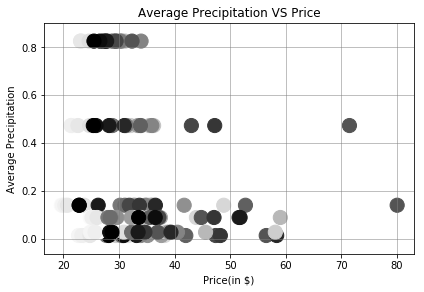

In [36]:
# plot correlation between percipitation and price
combined_data.plot.scatter('total_lmp_rt', 'Average of Precipitation', s=200, c=combined_data['time'])
plt.tight_layout()
plt.title("Average Precipitation VS Price")
plt.ylabel("Average Precipitation")
plt.xlabel("Price(in $)")
plt.grid(color='gray', linestyle='-', linewidth=0.5)
#plt.text(2000, 2000, textstr, fontsize=14)
# Save Figure
plt.figsize=(100,150)
plt.savefig("Images/AvgPrecipvsPrice.png")
plt.show()

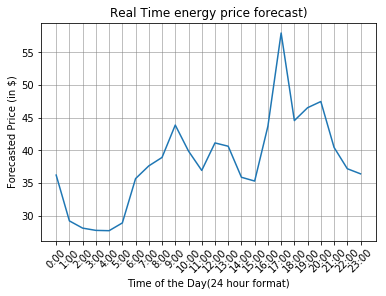

In [37]:
#line plot for tomorrow's forecasted Real Time Market Prices

plt.plot(merged_data['Time'],merged_data['forecast_rt_lmp'])
# Create a legend
# Incorporate the other graph properties
plt.title("Real Time energy price forecast)")
plt.ylabel("Forecasted Price (in $)")
plt.xlabel("Time of the Day(24 hour format)")
plt.grid(color='gray', linestyle='-', linewidth=0.5)
#plt.figure(figsize=(50,30))
_ = plt.xticks(rotation=45)
plt.savefig("Images/FcastPrice.png")
plt.show()

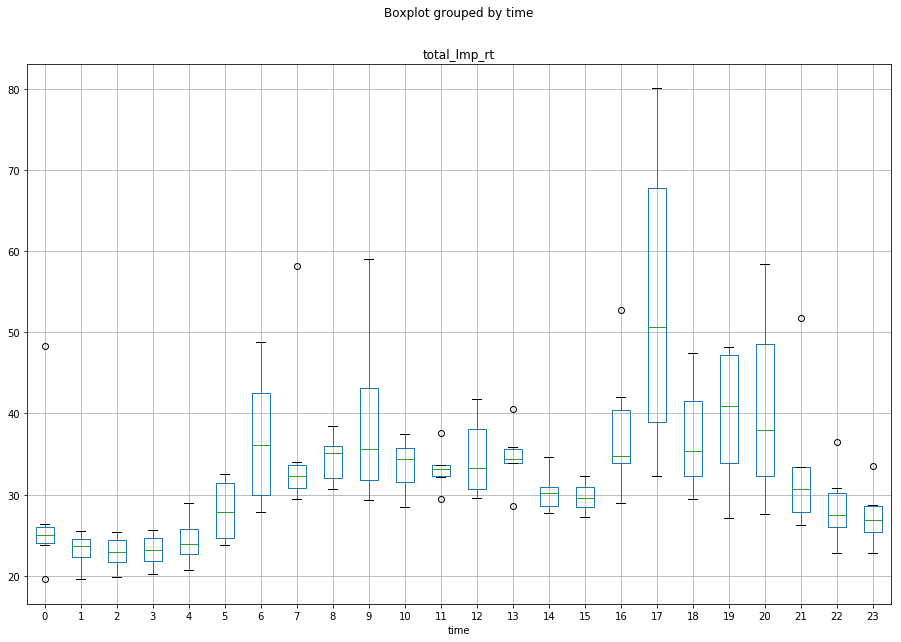

In [38]:
# box plot for showing the forecasted price
#plt.boxplot(combined_data['total_lmp_rt'])
combined_data.boxplot('total_lmp_rt', by='time', figsize=(15, 10))
plt.savefig("Images/FcastPrice_BoxPlot.png")
plt.show()

In [39]:
#create graph comparing forecaste RT prices to DA prices
path = 'Resources/11.14.18_da_price.csv'
real_data = pd.read_csv(path)
real_data.head()

rt_data = pd.merge(real_data,merged_data, how='outer', on='Time')
rt_data.head()

,pnode_x,date_time,Time,total_lmp_da,forecast,rt,dec,purchase,better?,Unnamed: 9,...,Wind,forecast_rt_lmp,forecast_datetime_beginning_ept,forecast_load_mw,Temp_y,Humidity,Precipitation,Wind Speed,Preciptation,Wind_Speed
0,DUQ,11/14/2018 0:00,0:00,32.653709,44.094592,32.165816,DA,32.653709,0.487893,NaN,...,0.932,36.227165,NaN,1489,35.366667,60.745098,0.043725,7.801961,0.043725,7.801961
1,DUQ,11/14/2018 1:00,1:00,31.168498,37.078592,30.937889,DA,31.168498,0.230609,NaN,...,0.932,29.211165,11/14/2018 0:00,1419,35.366667,60.745098,0.043725,7.801961,0.043725,7.801961
2,DUQ,11/14/2018 2:00,2:00,30.915450,35.973392,30.529084,DA,30.915450,0.386366,NaN,...,0.932,28.105965,11/14/2018 1:00,1390,35.366667,60.745098,0.043725,7.801961,0.043725,7.801961
3,DUQ,11/14/2018 3:00,3:00,31.761162,35.626592,32.147867,DA,31.761162,-0.386705,NaN,...,0.932,27.759165,11/14/2018 2:00,1379,35.366667,60.745098,0.043725,7.801961,0.043725,7.801961
4,DUQ,11/14/2018 4:00,4:00,33.281317,35.579392,35.503774,DA,33.281317,-2.222457,NaN,...,0.932,27.711965,11/14/2018 3:00,1385,35.366667,60.745098,0.043725,7.801961,0.043725,7.801961


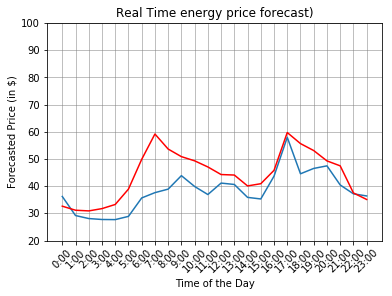

In [40]:
plt.plot(rt_data['Time'],rt_data['forecast_rt_lmp'], label="Forecast")
# Create a legend
# Incorporate the other graph properties
plt.title("Real Time energy price forecast)")
plt.ylabel("Forecasted Price (in $)")
plt.xlabel("Time of the Day")
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.figsize=(100,200)
_ = plt.xticks(rotation=45)
plt.plot(rt_data['Time'],rt_data['total_lmp_da'], label="Day Ahead", color="red")
plt.ylim(20,100)
plt.show
plt.savefig("Images/Forecast_v_DA")

In [41]:
#create plot to compare 

path = 'Resources/11.14.18_rt_price.csv'
real_data = pd.read_csv(path)
real_data.head()

rt_data = pd.merge(real_data,merged_data, how='outer', on='Time')
rt_data.head()

,Time,pnode_x,rt_price,pnode_y,intercept,Load,Temp_x,Hum,Prec,Wind,forecast_rt_lmp,forecast_datetime_beginning_ept,forecast_load_mw,Temp_y,Humidity,Precipitation,Wind Speed,Preciptation,Wind_Speed
0,0:00,DUQ,32.165816,DUQ,-80.4,0.0588,-0.078,0.417,-17.6,0.932,36.227165,NaN,1489,35.366667,60.745098,0.043725,7.801961,0.043725,7.801961
1,1:00,DUQ,30.937889,DUQ,-83.3,0.0588,-0.078,0.417,-17.6,0.932,29.211165,11/14/2018 0:00,1419,35.366667,60.745098,0.043725,7.801961,0.043725,7.801961
2,2:00,DUQ,30.529084,DUQ,-82.7,0.0588,-0.078,0.417,-17.6,0.932,28.105965,11/14/2018 1:00,1390,35.366667,60.745098,0.043725,7.801961,0.043725,7.801961
3,3:00,DUQ,32.147867,DUQ,-82.4,0.0588,-0.078,0.417,-17.6,0.932,27.759165,11/14/2018 2:00,1379,35.366667,60.745098,0.043725,7.801961,0.043725,7.801961
4,4:00,DUQ,35.503774,DUQ,-82.8,0.0588,-0.078,0.417,-17.6,0.932,27.711965,11/14/2018 3:00,1385,35.366667,60.745098,0.043725,7.801961,0.043725,7.801961


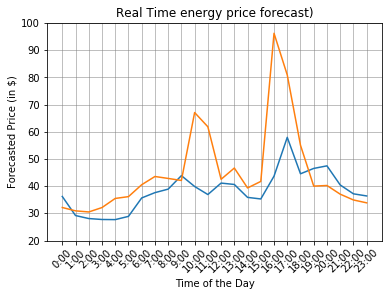

In [42]:
plt.plot(rt_data['Time'],rt_data['forecast_rt_lmp'], label="Forecast")
# Create a legend
# Incorporate the other graph properties
plt.title("Real Time energy price forecast)")
plt.ylabel("Forecasted Price (in $)")
plt.xlabel("Time of the Day")
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.figsize=(100,200)
_ = plt.xticks(rotation=45)
plt.plot(rt_data['Time'],rt_data['rt_price'], label="Actual")
plt.ylim(20,100)
plt.show
plt.savefig("Images/Forecast_w_111418")